In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.linalg import eig
import os

In [2]:
path = "C:/Users/Sachith/Desktop/work_oh/bulk_water/MD1_original"

In [3]:
f=open(path +'/input_data.dat','r')
lines=f.readlines()
for line in lines[0:]:
    data=line.split()
    if data[0]=='nsteps:':
        nsteps = int(data[1])
    if data[0]=='natoms:':
        natoms = int(data[1])
    if data[0]=='nonmvat:':
        nonmvat = int(data[1])
    if data[0]=='nmovingatoms:':
        nmovingatoms = int(data[1])
    if data[0]=='MDRestartFrequency:':
        MDRestartFrequency = int(data[1])
    if data[0]=='dt:':
        dt = float(data[1])
    if data[0]=='noh:':
        noh = int(data[1])
    if data[0]=='nwater:':
        nwater = int(data[1])
    if data[0]=='nox:':
        nox = int(data[1])
    if data[0]=='nhy:':
        nhy = int(data[1])
    if data[0]=='xbox:':
        xbox = float(data[1])
    if data[0]=='ybox:':
        ybox = float(data[1])
    if data[0]=='zbox:':
        zbox = float(data[1])
        
nsteps = int((nsteps/MDRestartFrequency)+1)-1
nstep = nsteps
        
print('nsteps:','  ',nstep )
print('natoms:','  ',natoms)
print('nonmvat:','  ',nonmvat)
print('nmovingatoms:','  ',nmovingatoms)
print('MDRestartFrequency:','  ',MDRestartFrequency)
print('dt:','  ',dt)
print('noh:','  ',noh)
print('nwater:','  ',nwater)
print('nox:','  ',nox)
print('nhy:','  ',nhy)
print('xbox:','  ',xbox)
print('ybox:','  ',ybox)
print('zbox:','  ',zbox)

nsteps:    20000
natoms:    654
nonmvat:    432
nmovingatoms:    222
MDRestartFrequency:    1
dt:    1.0
noh:    0
nwater:    74
nox:    74
nhy:    148
xbox:    22.784
ybox:    13.3552
zbox:    40.0


In [4]:
ox = np.empty(nox,dtype=int)
hy = np.empty(nhy+1,dtype=int)

mm = 0
nn = 1
while mm<(nox):
    ox[mm] = nn+nonmvat
    mm = mm+1
    nn = nn+3

mm = 0
nn =1
while mm<(nhy):
    hy[mm] = nn+nonmvat+1
    hy[mm+1] = nn+nonmvat+2
    mm = mm+2
    nn = nn+3
hy = hy[:-1]

print(ox)
print(hy)

[433 436 439 442 445 448 451 454 457 460 463 466 469 472 475 478 481 484
 487 490 493 496 499 502 505 508 511 514 517 520 523 526 529 532 535 538
 541 544 547 550 553 556 559 562 565 568 571 574 577 580 583 586 589 592
 595 598 601 604 607 610 613 616 619 622 625 628 631 634 637 640 643 646
 649 652]
[434 435 437 438 440 441 443 444 446 447 449 450 452 453 455 456 458 459
 461 462 464 465 467 468 470 471 473 474 476 477 479 480 482 483 485 486
 488 489 491 492 494 495 497 498 500 501 503 504 506 507 509 510 512 513
 515 516 518 519 521 522 524 525 527 528 530 531 533 534 536 537 539 540
 542 543 545 546 548 549 551 552 554 555 557 558 560 561 563 564 566 567
 569 570 572 573 575 576 578 579 581 582 584 585 587 588 590 591 593 594
 596 597 599 600 602 603 605 606 608 609 611 612 614 615 617 618 620 621
 623 624 626 627 629 630 632 633 635 636 638 639 641 642 644 645 647 648
 650 651 653 654]


In [5]:
msd_of_oh = np.empty(nstep)
msd_of_ohx = np.empty(nstep)
msd_of_ohy = np.empty(nstep)
msd_of_ohz = np.empty(nstep)
oh_index = np.empty(nstep)
xoh = np.empty(nstep)
yoh = np.empty(nstep)
zoh = np.empty(nstep)
atom= ['Non']*(natoms)
x_ox = np.empty(nstep*nox).reshape(nox,nstep)
y_ox = np.empty(nstep*nox).reshape(nox,nstep)
z_ox = np.empty(nstep*nox).reshape(nox,nstep)

x_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
y_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
z_hy = np.empty(nstep*nhy).reshape(nhy,nstep)

In [6]:
jj=0
kk=0
f=open(path +'/geo_end.xyz','r')
lines=f.readlines()
while jj < nstep:
    io=0
    ih=0
    for line in lines[kk+nonmvat+2:(kk+natoms+2)]:
        data=line.split()
        if len(data)>3:
            if data[0]=='O':
                x_ox[io][jj]=float(data[1])
                y_ox[io][jj]=float(data[2])
                z_ox[io][jj]=float(data[3])
                io = io+1
            elif data[0]=='H':
                x_hy[ih][jj]=float(data[1])
                y_hy[ih][jj]=float(data[2])
                z_hy[ih][jj]=float(data[3])
                ih = ih+1
    kk=kk+natoms+2
    jj=jj+1
f.close()

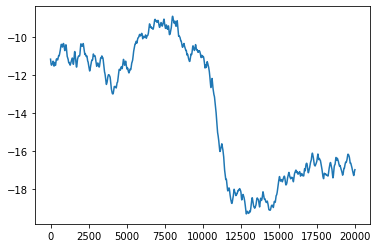

In [7]:
plt.figure()
plt.plot(x_ox[0][:])

In [123]:
aa = 52
x_o = np.empty(nstep)
x_o = x_ox[aa][:]
y_o = y_ox[aa][:]
z_o = z_ox[aa][:]

In [124]:
x_o = x_o[:10000:10]
y_o = y_o[:10000:10]
z_o = z_o[:10000:10]

In [125]:
os.mkdir('C:/Users/Sachith/Desktop/work_oh/bulk_water/md24')
path2 = 'C:/Users/Sachith/Desktop/work_oh/bulk_water/md24'

In [126]:
kk=0
f=open(path2 +'/oh1.dat','w')
while kk < 1000 :
    print('{:<6d}'.format(kk),'{:<6d}'.format(248),'{0: >#016.8f}'.format(x_o[kk]),'{0: >#016.8f}'.format(y_o[kk]),'{0: >#016.8f}'.format(z_o[kk]),file =f )
    kk=kk+1
f.close()

In [127]:
len(x_o)

1000

In [ ]:
msdx = np.empty(nstep)
msdy = np.empty(nstep)
msdz = np.empty(nstep)

msdx = (x_o-x_o[0])**2
msdy = (y_o-y_o[0])**2
msdz = (z_o-z_o[0])**2
msdxy = (x_o-x_o[0])*(y_o-y_o[0])
msdxz = (x_o-x_o[0])*(z_o-z_o[0])
msdyz = (y_o-y_o[0])*(z_o-z_o[0])

In [ ]:
nmsdend = 1000
st = 0
nd = nmsdend
time=np.arange(len(msdx))
time=time/(1000/(dt*10*MDRestartFrequency)) #/(1000/dt*steps)
fitx=np.polyfit(time[st:nd],msdx[st:nd],1)
fity=np.polyfit(time[st:nd],msdy[st:nd],1)
fitz=np.polyfit(time[st:nd],msdz[st:nd],1)
fitxy=np.polyfit(time[st:nd],msdxy[st:nd],1)
fitxz=np.polyfit(time[st:nd],msdxz[st:nd],1)
fityz=np.polyfit(time[st:nd],msdyz[st:nd],1)

In [ ]:
print('starting point     =','{0: >#014.2f}'.format(st))
print('end point          =','{0: >#014.2f}'.format(nd))
print('slope of msd in X  =','{0: >#014.10f}'.format(fitx[0]))
print('slope of msd in Y  =','{0: >#014.10f}'.format(fity[0]))
print('slope of msd in Z  =','{0: >#014.10f}'.format(fitz[0]))

In [ ]:
dxx = fitx[0]/2
dyy = fity[0]/2
dzz = fitz[0]/2
dxy = fitxy[0]/2
dxz = fitxz[0]/2
dyz = fityz[0]/2

In [ ]:
dd3d = np.array([[dxx, dxy, dxz], 
                 [dxy, dyy, dyz],
                 [dxz, dyz, dzz]]) 
w,v=eig(dd3d)

In [ ]:
print('Dx  =','{0: >#014.10f}'.format(w[0]))
print('Dy  =','{0: >#014.10f}'.format(w[1]))
print('Dz  =','{0: >#014.10f}'.format(w[2]))
print('D   =','{0: >#014.10f}'.format((w[0]+w[1]+w[2])/3))
print('-----------------------')
print('Dx  =','{0: >#014.10f}'.format(dxx))
print('Dy  =','{0: >#014.10f}'.format(dyy))
print('Dz  =','{0: >#014.10f}'.format(dzz))
print('D   =','{0: >#014.10f}'.format((dxx+dyy+dzz)/3))

In [ ]:
dd2d = np.array([[dxx, dxy], 
                 [dxy, dyy]])
w2,v2=eig(dd2d)

In [ ]:
print('Dx  =','{0: >#014.10f}'.format(w2[0]))
print('Dy  =','{0: >#014.10f}'.format(w2[1]))
print('D   =','{0: >#014.10f}'.format((w2[0]+w2[1])/2))
print('-----------------------')
print('Dx  =','{0: >#014.10f}'.format(dxx))
print('Dy  =','{0: >#014.10f}'.format(dyy))
print('D   =','{0: >#014.10f}'.format((dxx+dyy)/2))

In [ ]:
'''
ndt = 100
mmsdx = np.empty(ndt)
mmsdy = np.empty(ndt)
mmsdz = np.empty(ndt)
mmsdxy = np.empty(ndt)
mmsdxz = np.empty(ndt)
mmsdyz = np.empty(ndt)
dtime = np.empty(ndt)
#dtime = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]
dtime=  np.arange(0.01, (0.01*ndt+0.01), 0.01)

kk = 0
while kk<ndt:
    mmsdx[kk] = 0.0
    mmsdy[kk] = 0.0
    mmsdz[kk] = 0.0
    mmsdxy[kk] = 0.0
    mmsdxz[kk] = 0.0
    mmsdyz[kk] = 0.0
    jj = 0
    while jj< (len(x_o)-1-kk):
        mmsdx[kk] = (x_o[jj+kk+1]-x_o[jj])**2+mmsdx[kk]
        mmsdy[kk] = (y_o[jj+kk+1]-y_o[jj])**2+mmsdy[kk]
        mmsdz[kk] = (z_o[jj+kk+1]-z_o[jj])**2+mmsdz[kk]
        mmsdxy[kk] = ((x_o[jj+kk+1]-x_o[jj])*(y_o[jj+kk+1]-y_o[jj]))+mmsdxy[kk]
        mmsdxz[kk] = ((x_o[jj+kk+1]-x_o[jj])*(z_o[jj+kk+1]-z_o[jj]))+mmsdxz[kk]
        mmsdyz[kk] = ((y_o[jj+kk+1]-y_o[jj])*(z_o[jj+kk+1]-z_o[jj]))+mmsdyz[kk]
        jj = jj+1
    mmsdx[kk] = mmsdx[kk]/(len(x_o)-1-kk)
    mmsdy[kk] = mmsdy[kk]/(len(x_o)-1-kk)
    mmsdz[kk] = mmsdz[kk]/(len(x_o)-1-kk)
    mmsdxy[kk] = mmsdxy[kk]/(len(x_o)-1-kk)
    mmsdxz[kk] = mmsdxz[kk]/(len(x_o)-1-kk)
    mmsdyz[kk] = mmsdyz[kk]/(len(x_o)-1-kk)
    kk = kk+1

'''

In [ ]:
ndt = 50
mmsdx = np.empty(ndt)
mmsdy = np.empty(ndt)
mmsdz = np.empty(ndt)
mmsdxy = np.empty(ndt)
mmsdxz = np.empty(ndt)
mmsdyz = np.empty(ndt)
dtime = np.empty(ndt)
#dtime = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]
dtime=  np.arange(0.01, (0.01*ndt+0.01), 0.01)

        
kk = 0
while kk<ndt:
    mmsdx[kk] = 0.0
    mmsdy[kk] = 0.0
    mmsdz[kk] = 0.0
    mmsdxy[kk] = 0.0
    mmsdxz[kk] = 0.0
    mmsdyz[kk] = 0.0
    x_oo = x_o[::(kk+1)]
    y_oo = y_o[::(kk+1)]
    z_oo = z_o[::(kk+1)]
    
    jj = 0
    while jj< (len(x_oo)-1):
        mmsdx[kk] = (x_oo[jj+1]-x_oo[jj])**2+mmsdx[kk]
        mmsdy[kk] = (y_oo[jj+1]-y_oo[jj])**2+mmsdy[kk]
        mmsdz[kk] = (z_oo[jj+1]-z_oo[jj])**2+mmsdz[kk]
        mmsdxy[kk] = ((x_oo[jj+1]-x_oo[jj])*(y_oo[jj+1]-y_oo[jj]))+mmsdxy[kk]
        mmsdxz[kk] = ((x_oo[jj+1]-x_oo[jj])*(z_oo[jj+1]-z_oo[jj]))+mmsdxz[kk]
        mmsdyz[kk] = ((y_oo[jj+1]-y_oo[jj])*(z_oo[jj+1]-z_oo[jj]))+mmsdyz[kk]
        jj = jj+1
    mmsdx[kk] = mmsdx[kk]/(len(x_oo)-1)
    mmsdy[kk] = mmsdy[kk]/(len(x_oo)-1)
    mmsdz[kk] = mmsdz[kk]/(len(x_oo)-1)
    mmsdxy[kk] = mmsdxy[kk]/(len(x_oo)-1)
    mmsdxz[kk] = mmsdxz[kk]/(len(x_oo)-1)
    mmsdyz[kk] = mmsdyz[kk]/(len(x_oo)-1)
    kk = kk+1



In [ ]:
fitx=np.polyfit(dtime[:],mmsdx[:],1)
fity=np.polyfit(dtime[:],mmsdy[:],1)
fitz=np.polyfit(dtime[:],mmsdz[:],1)
fitxy=np.polyfit(dtime[:],mmsdxy[st:nd],1)
fitxz=np.polyfit(dtime[:],mmsdxz[st:nd],1)
fityz=np.polyfit(dtime[:],mmsdyz[st:nd],1)

In [ ]:
dxx = fitx[0]/2
dyy = fity[0]/2
dzz = fitz[0]/2
dxy = fitxy[0]/2
dxz = fitxz[0]/2
dyz = fityz[0]/2

In [ ]:
dd3d = np.array([[dxx, dxy, dxz], 
                 [dxy, dyy, dyz],
                 [dxz, dyz, dzz]])
w,v=eig(dd3d)

print('E-value:', w)
print('E-vector', v)
print('mamtrix', dd3d)

In [ ]:
print('Dx  =','{0: >#014.10f}'.format(w[0]))
print('Dy  =','{0: >#014.10f}'.format(w[1]))
print('Dz  =','{0: >#014.10f}'.format(w[2]))
print('D   =','{0: >#014.10f}'.format((w[0]+w[1]+w[2])/3))
print('-----------------------')
print('Dx  =','{0: >#014.10f}'.format(dxx))
print('Dy  =','{0: >#014.10f}'.format(dyy))
print('Dz  =','{0: >#014.10f}'.format(dzz))
print('D   =','{0: >#014.10f}'.format((dxx+dyy+dzz)/3))

In [ ]:
dd2d = np.array([[dxx, dxy], 
                 [dxy, dyy]])
w2,v2=eig(dd2d)

print('Dx  =','{0: >#014.10f}'.format(w2[0]))
print('Dy  =','{0: >#014.10f}'.format(w2[1]))
print('D   =','{0: >#014.10f}'.format((w2[0]+w2[1])/2))
print('-----------------------')
print('Dx  =','{0: >#014.10f}'.format(dxx))
print('Dy  =','{0: >#014.10f}'.format(dyy))
print('D   =','{0: >#014.10f}'.format((dxx+dyy)/2))

In [ ]:
plt.figure()
plt.plot(dtime[:],mmsdx[:])
plt.plot(dtime[:],mmsdy[:])
plt.plot(dtime[:],mmsdz[:])

plt.figure()
plt.plot(dtime[:],mmsdx[:])
plt.figure()
plt.plot(dtime[:],mmsdy[:])
plt.figure()
plt.plot(dtime[:],mmsdz[:])

In [ ]:
len(x_o)

In [ ]:
plt.figure()
plt.plot(dtime[:],mmsdx[:],color='r',linewidth=2,label="x")
plt.plot(dtime[:],mmsdy[:],color='g',linewidth=2,label="y")
plt.plot(dtime[:],mmsdz[:],color='b',linewidth=2,label="z")
#plt.plot(dtime[:],pred_msdx[:],'--',color='r',linewidth=2)

plt.legend(loc="upper left")
plt.xlabel('τ (ps)')
plt.ylabel('MSD')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
#plt.savefig(path +'/msd.jpg', dpi=400)

In [ ]:
time[2]

In [ ]:
dtime[1]

In [ ]:
0.8182419897/0.4254597164